In [ ]:
import pandas as pd

In [ ]:
# Load the data
data = pd.read_csv('projectdata.csv')

In [ ]:
# Display the first few rows
print(data.head())

                event_time event_type  product_id   category_id  \
0  2019-11-01 00:00:00 UTC       view     1003461  2.053010e+18   
1  2019-11-01 00:00:00 UTC       view     5000088  2.053010e+18   
2  2019-11-01 00:00:01 UTC       view    17302664  2.053010e+18   
3  2019-11-01 00:00:01 UTC       view     3601530  2.053010e+18   
4  2019-11-01 00:00:01 UTC       view     1004775  2.053010e+18   

               category_code   brand   price    user_id  \
0     electronics.smartphone  xiaomi  489.07  520088904   
1  appliances.sewing_machine  janome  293.65  530496790   
2                        NaN   creed   28.31  561587266   
3  appliances.kitchen.washer      lg  712.87  518085591   
4     electronics.smartphone  xiaomi  183.27  558856683   

                           user_session  
0  4d3b30da-a5e4-49df-b1a8-ba5943f1dd33  
1  8e5f4f83-366c-4f70-860e-ca7417414283  
2  755422e7-9040-477b-9bd2-6a6e8fd97387  
3  3bfb58cd-7892-48cc-8020-2f17e6de6e7f  
4  313628f1-68b8-460d-84f6-cec7a

In [ ]:
# Display the dataset info (datatypes, non-null counts)
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   event_time     1048575 non-null  object 
 1   event_type     1048575 non-null  object 
 2   product_id     1048575 non-null  int64  
 3   category_id    1048575 non-null  float64
 4   category_code  716498 non-null   object 
 5   brand          894260 non-null   object 
 6   price          1048575 non-null  float64
 7   user_id        1048575 non-null  int64  
 8   user_session   1048575 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 72.0+ MB
None


In [ ]:
# Check basic statistics for numerical columns
print(data.describe())

         product_id   category_id         price       user_id
count  1.048575e+06  1.048575e+06  1.048575e+06  1.048575e+06
mean   1.062323e+07  2.057566e+18  2.925054e+02  5.352223e+08
std    1.202236e+07  1.895980e+16  3.478039e+02  2.015196e+07
min    1.000978e+06  2.053010e+18  0.000000e+00  2.749691e+08
25%    1.005186e+06  2.053010e+18  6.976000e+01  5.159398e+08
50%    4.900337e+06  2.053010e+18  1.721900e+02  5.307890e+08
75%    1.570018e+07  2.053010e+18  3.621000e+02  5.545297e+08
max    6.170001e+07  2.180740e+18  2.574070e+03  5.665139e+08


In [ ]:
#data cleaning
print(data.isnull().sum())

event_time            0
event_type            0
product_id            0
category_id           0
category_code    332077
brand            154315
price                 0
user_id               0
user_session          0
dtype: int64


In [ ]:
#Check for duplicates
print(data.duplicated().sum())

518


In [ ]:
#remove duplicates
data = data.drop_duplicates()


In [ ]:
# Event type distribution
event_counts = data['event_type'].value_counts()
print(event_counts)

event_type
view        1014722
purchase      18367
cart          14968
Name: count, dtype: int64


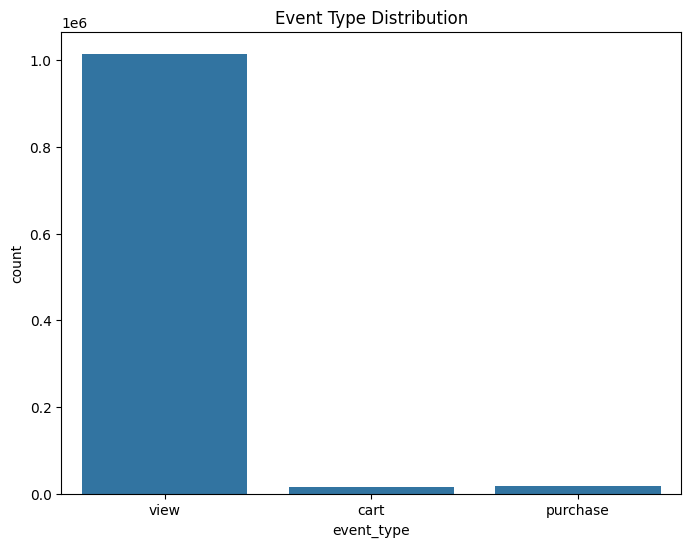

In [ ]:
# Visualize event type distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.countplot(x='event_type', data=data)
plt.title('Event Type Distribution')
plt.show()

In [ ]:
# Distribution of product categories
category_counts = data['category_id'].value_counts()
print(category_counts)

category_id
2.053010e+18    974673
2.172370e+18      7626
2.116910e+18      5408
2.146660e+18      4939
2.127430e+18      4082
                 ...  
2.166770e+18        12
2.082720e+18        10
2.164480e+18         6
2.155240e+18         1
2.163210e+18         1
Name: count, Length: 116, dtype: int64


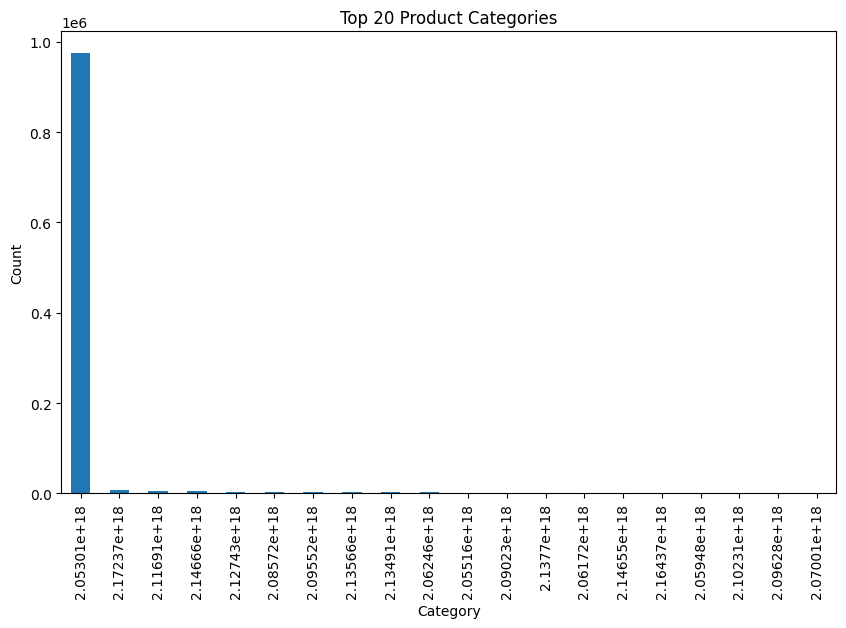

In [ ]:
# Visualize category distribution
plt.figure(figsize=(10, 6))
category_counts.head(20).plot(kind='bar')
plt.title('Top 20 Product Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

In [ ]:
# Summary statistics for numerical columns
print(data.describe())

         product_id   category_id         price       user_id
count  1.048057e+06  1.048057e+06  1.048057e+06  1.048057e+06
mean   1.062672e+07  2.057568e+18  2.925281e+02  5.352207e+08
std    1.202368e+07  1.896271e+16  3.478366e+02  2.015181e+07
min    1.000978e+06  2.053010e+18  0.000000e+00  2.749691e+08
25%    1.005186e+06  2.053010e+18  6.972000e+01  5.159384e+08
50%    4.900414e+06  2.053010e+18  1.722000e+02  5.307876e+08
75%    1.570018e+07  2.053010e+18  3.621000e+02  5.545265e+08
max    6.170001e+07  2.180740e+18  2.574070e+03  5.665139e+08


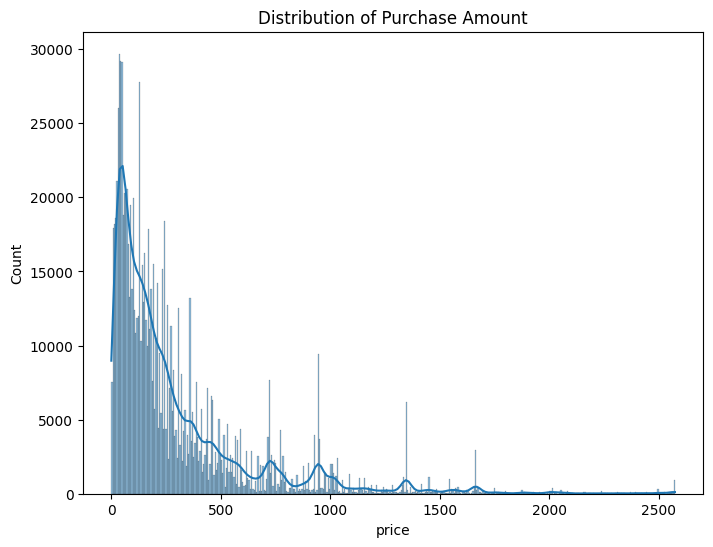

In [ ]:
# Visualize distribution of `purchase_amount` (if it exists)
plt.figure(figsize=(8, 6))
sns.histplot(data['price'], kde=True)
plt.title('Distribution of Purchase Amount')
plt.show()

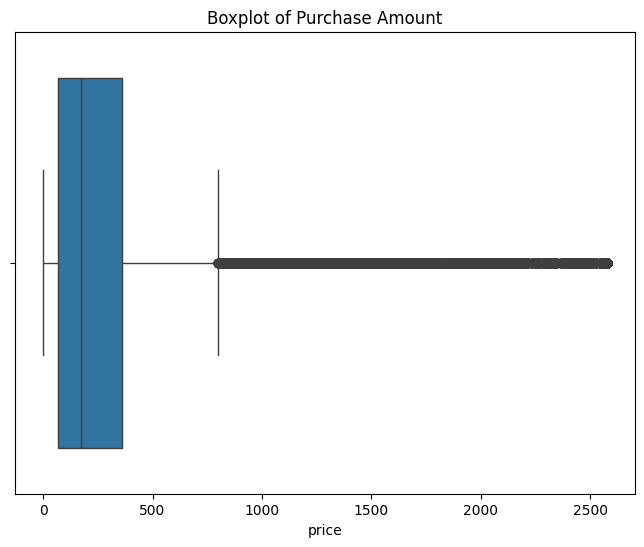

In [ ]:
# Boxplot to detect outliers in purchase_amount
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['price'])
plt.title('Boxplot of Purchase Amount')
plt.show()

In [ ]:
# Convert 'event_time' to datetime if not done already
data['event_time'] = pd.to_datetime(data['event_time'], errors='coerce')

In [ ]:
# Extract date and time features
data['hour'] = data['event_time'].dt.hour
data['day_of_week'] = data['event_time'].dt.dayofweek
data['date'] = data['event_time'].dt.date

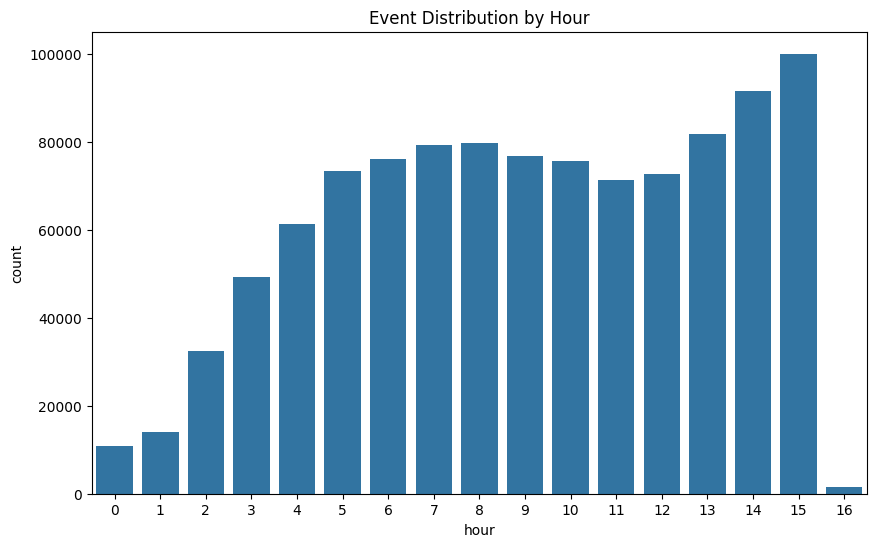

In [ ]:
# Plot events by hour
plt.figure(figsize=(10, 6))
sns.countplot(x='hour', data=data)
plt.title('Event Distribution by Hour')
plt.show()

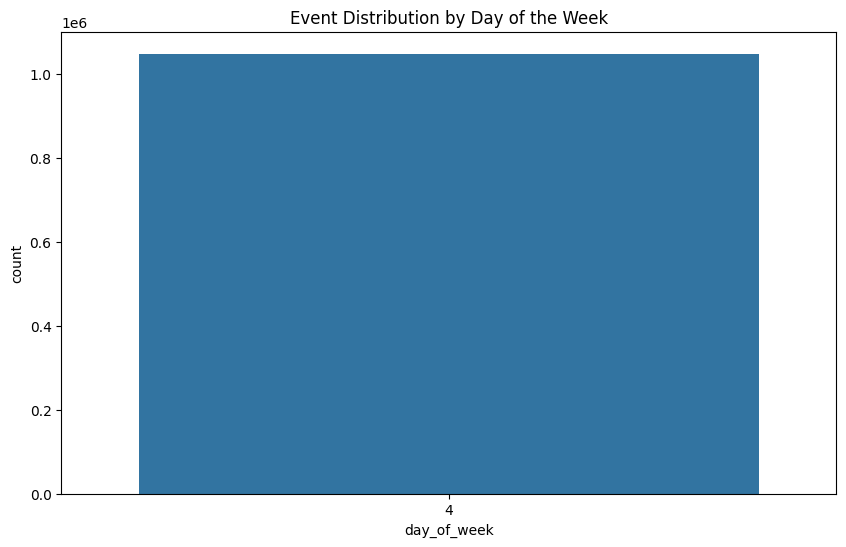

In [ ]:
# Plot events by day of the week
plt.figure(figsize=(10, 6))
sns.countplot(x='day_of_week', data=data)
plt.title('Event Distribution by Day of the Week')
plt.show()

In [ ]:
# Group events by date
events_per_day = data.groupby('date').size()


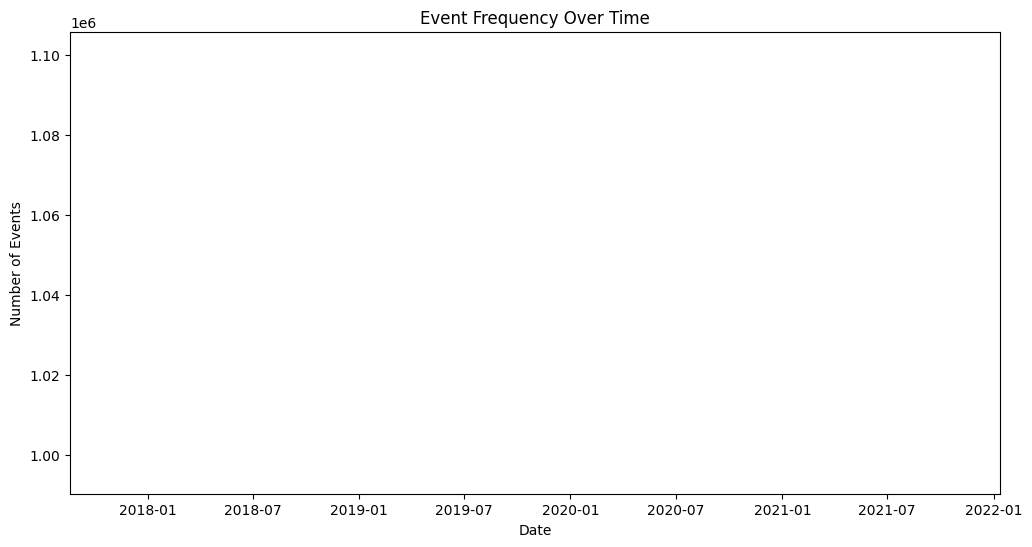

In [ ]:
# Plot time series
plt.figure(figsize=(12, 6))
events_per_day.plot()
plt.title('Event Frequency Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Events')
plt.show()

In [ ]:
# Number of unique users
print(data['user_id'].nunique())

176639


In [ ]:
# Distribution of user activity
user_activity = data.groupby('user_id').size()

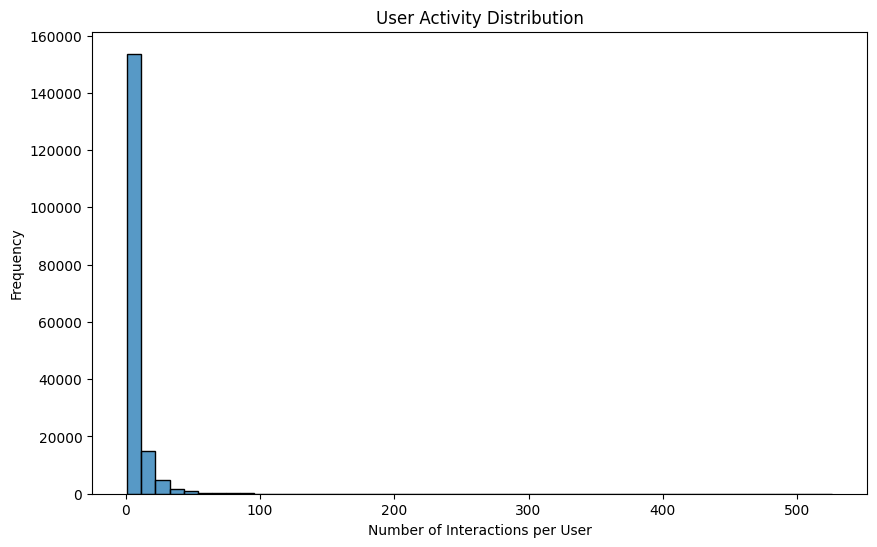

In [ ]:
# Visualize user activity distribution
plt.figure(figsize=(10, 6))
sns.histplot(user_activity, bins=50)
plt.title('User Activity Distribution')
plt.xlabel('Number of Interactions per User')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Session duration analysis
session_duration = data.groupby('user_session')['event_time'].agg(['min', 'max'])
session_duration['duration'] = (session_duration['max'] - session_duration['min']).dt.total_seconds()

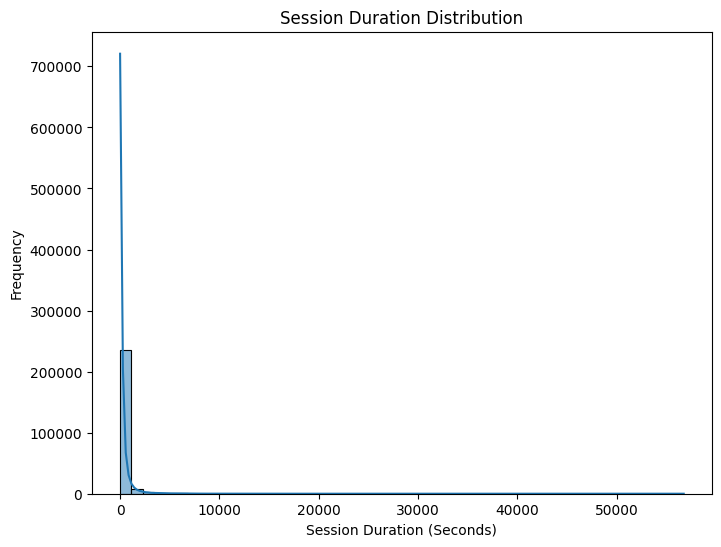

In [ ]:
# Plot distribution of session durations
plt.figure(figsize=(8, 6))
sns.histplot(session_duration['duration'], bins=50, kde=True)
plt.title('Session Duration Distribution')
plt.xlabel('Session Duration (Seconds)')
plt.ylabel('Frequency')
plt.show()


Identify Abandoned Carts

In [ ]:
# Group by user and identify abandoned carts (viewed items but no purchase)
abandoned_carts = data[data['event_type'] == 'cart'].groupby('user_id').size()
purchases = data[data['event_type'] == 'purchase'].groupby('user_id').size()

In [ ]:
# Assuming 'data' is the raw dataset
# Aggregating session-level data
session_data = data.groupby('user_session').agg({
    'event_type': [
        lambda x: (x == 'view').sum(),  # Total views
        lambda x: (x == 'cart').sum(),  # Total cart additions
        lambda x: (x == 'purchase').sum()  # Total purchases
    ],
    'event_time': ['min', 'max']  # Session start and end time
}).reset_index()

# Flattening multi-level columns
session_data.columns = ['user_session', 'view_count', 'cart_count', 'is_purchase', 'session_start', 'session_end']

# Calculate session duration
session_data['session_duration'] = (session_data['session_end'] - session_data['session_start']).dt.total_seconds()

# Display the first few rows of the aggregated data
print(session_data.head())


                           user_session  view_count  cart_count  is_purchase  \
0  00006bc8-78c7-4100-ba97-37352c9af491          13           0            0   
1  00008ebc-a8c1-48c2-beb9-aa4448e93639           4           0            0   
2  0000b0f0-9fb0-41a3-bdfa-3fa1d28b2e7c           4           0            0   
3  0000cf90-3ea4-4526-aca3-a48a739b66f1           2           0            0   
4  0000d82e-3614-4362-a1d3-2a56a895fdc6           2           0            0   

              session_start               session_end  session_duration  
0 2019-11-01 11:57:19+00:00 2019-11-01 13:36:41+00:00            5962.0  
1 2019-11-01 13:11:19+00:00 2019-11-01 13:18:40+00:00             441.0  
2 2019-11-01 10:37:08+00:00 2019-11-01 10:37:45+00:00              37.0  
3 2019-11-01 15:02:17+00:00 2019-11-01 15:02:54+00:00              37.0  
4 2019-11-01 07:37:28+00:00 2019-11-01 07:38:48+00:00              80.0  


In [ ]:
# Add engagement score as the sum of views and cart additions
session_data['engagement_score'] = session_data['view_count'] + session_data['cart_count']

# Check the result
print(session_data[['user_session', 'engagement_score']].head())

                           user_session  engagement_score
0  00006bc8-78c7-4100-ba97-37352c9af491                13
1  00008ebc-a8c1-48c2-beb9-aa4448e93639                 4
2  0000b0f0-9fb0-41a3-bdfa-3fa1d28b2e7c                 4
3  0000cf90-3ea4-4526-aca3-a48a739b66f1                 2
4  0000d82e-3614-4362-a1d3-2a56a895fdc6                 2


In [ ]:
print(session_data.columns)


Index(['user_session', 'view_count', 'cart_count', 'is_purchase',
       'session_start', 'session_end', 'session_duration', 'engagement_score'],
      dtype='object')


In [ ]:
# Calculate features from raw data
session_data = data.groupby('user_session').agg({
    'event_type': lambda x: (x == 'view').sum(),  # Count views
    'event_type': lambda x: (x == 'cart').sum()  # Count cart additions
}).reset_index()

**Logistic Regression**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('projectdata.csv')

In [ ]:
# Step 2: Convert `event_time` to datetime
data['event_time'] = pd.to_datetime(data['event_time'], errors='coerce')

In [ ]:
# Aggregate data at the session level
session_data = data.groupby('user_session').agg(
    session_start=('event_time', 'min'),  # Session start time
    session_end=('event_time', 'max'),  # Session end time
    view_count=('event_type', lambda x: (x == 'view').sum()),  # Count views
    cart_count=('event_type', lambda x: (x == 'cart').sum()),  # Count carts
    is_purchase=('event_type', lambda x: (x == 'purchase').any())  # Check if purchase occurred
).reset_index()

In [ ]:
# Flatten multi-level columns
session_data.columns = ['user_session', 'session_start', 'session_end', 'view_count', 'cart_count', 'is_purchase']

In [ ]:
# Step 4: Calculate session duration
session_data['session_duration'] = (session_data['session_end'] - session_data['session_start']).dt.total_seconds()


In [ ]:
# Ensure the target column is binary
session_data['is_purchase'] = session_data['is_purchase'].astype(int)

In [ ]:
# Step 5: Prepare features (X) and target (y)
X = session_data[['view_count', 'cart_count', 'session_duration']]
y = session_data['is_purchase']

In [ ]:
# Handle missing values if any
X.fillna(0, inplace=True)

<ipython-input-40-9b801b865820>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(0, inplace=True)


In [ ]:
# Step 6: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Step 7: Train Logistic Regression model
log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
# Step 8: Make predictions
y_pred = log_model.predict(X_test)
y_pred_prob = log_model.predict_proba(X_test)[:, 1]

In [ ]:
# Step 9: Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9387206340220775
Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97     46298
           1       0.62      0.11      0.19      3164

    accuracy                           0.94     49462
   macro avg       0.78      0.55      0.58     49462
weighted avg       0.92      0.94      0.92     49462



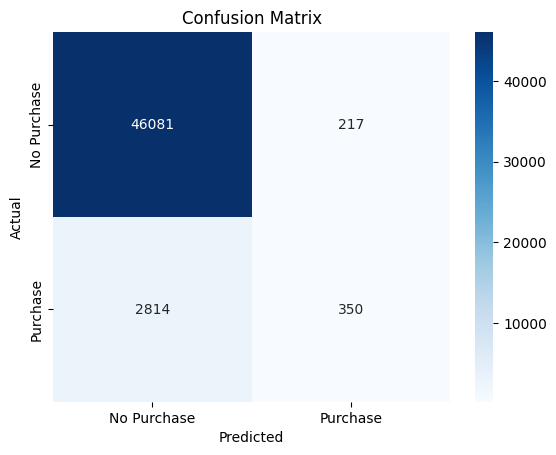

In [ ]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Purchase', 'Purchase'], yticklabels=['No Purchase', 'Purchase'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

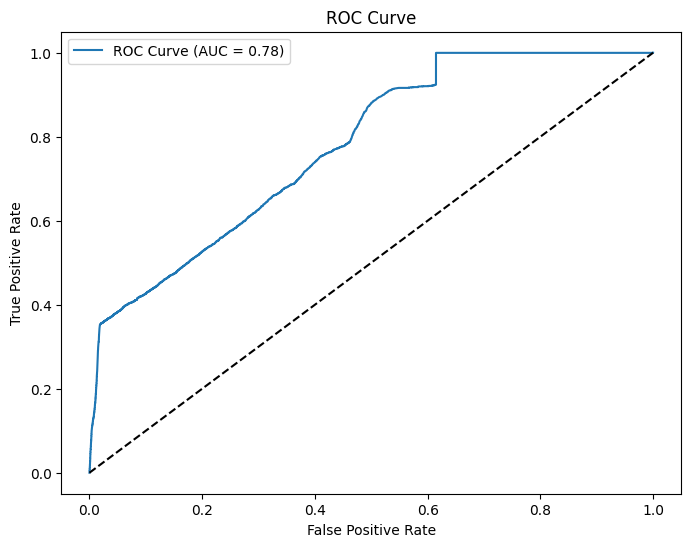

In [ ]:
# Step 10: Plot ROC Curve and compute AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc_score = roc_auc_score(y_test, y_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_score:.2f})")
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [ ]:
# Step 11: Feature importance (coefficients)
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': log_model.coef_[0]
})
print("Feature Importance:\n", coefficients.sort_values(by='Coefficient', ascending=False))

Feature Importance:
             Feature  Coefficient
1        cart_count     1.866711
0        view_count     0.007687
2  session_duration     0.000051


**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Initialize and train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Make predictions
y_pred_rf = rf_model.predict(X_test)
y_pred_prob_rf = rf_model.predict_proba(X_test)[:, 1]


In [ ]:
# Evaluate the model
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.9433908859326352
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97     46298
           1       0.60      0.36      0.45      3164

    accuracy                           0.94     49462
   macro avg       0.78      0.67      0.71     49462
weighted avg       0.93      0.94      0.94     49462



**Collaborative Filtering (SVD)**

In [ ]:
!pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 5.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357281 sha256=7769b5f4522be115c5026c5650528341c37bafde5a872d6fa867177542e3b890
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


In [ ]:
from surprise import SVD, Dataset, Reader
from surprise.model_selection import train_test_split

In [ ]:
# Prepare data for collaborative filtering
interaction_data = data[data['event_type'] == 'purchase'][['user_id', 'product_id']]
interaction_data['rating'] = 1  # Binary interaction: 1 if purchased
reader = Reader(rating_scale=(0, 1))
dataset = Dataset.load_from_df(interaction_data[['user_id', 'product_id', 'rating']], reader)


In [ ]:
# Split into train and test
trainset, testset = train_test_split(dataset, test_size=0.2)

In [ ]:
# Train SVD model
svd_model = SVD()
svd_model.fit(trainset)

In [ ]:
# Predict for a user-product pair
pred = svd_model.predict(uid='user_1', iid='product_1')
print(f"Predicted Rating for User 1 and Product 1: {pred.est}")

Predicted Rating for User 1 and Product 1: 1


In [ ]:
from surprise import accuracy

# Step 7: Evaluate the model
predictions = svd_model.test(testset)
print("Root Mean Squared Error (RMSE):")
print(accuracy.rmse(predictions)) # Use accuracy.rmse from the surprise library

Root Mean Squared Error (RMSE):
RMSE: 0.0290
0.029030353963233984


In [ ]:
user_id = '520088904'  # Replace with a valid user_id from your dataset
product_id = '1003461'  # Replace with a valid product_id from your dataset
pred = svd_model.predict(uid=user_id, iid=product_id)
print(f"Predicted Rating for User {user_id} and Product {product_id}: {pred.est}")

Predicted Rating for User 520088904 and Product 1003461: 1


In [ ]:
# Step 9: Generate Top-N Recommendations for All Users
from collections import defaultdict  # Import defaultdict

def get_top_n_recommendations(predictions, n=5):
    """Return the top-N recommendations for each user."""
    top_n = defaultdict(list)  # Now defaultdict is defined
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)  # Sort by estimated rating
        top_n[uid] = user_ratings[:n]
    return top_n

In [ ]:
# Generate Top-5 recommendations for all users
top_n = get_top_n_recommendations(predictions, n=5)

In [ ]:
# Display recommendations for a few users
for user_id, recommendations in list(top_n.items())[:5]:  # Show top 5 users
    print(f"User {user_id}:")
    for product_id, score in recommendations:
        print(f"  Product {product_id} with predicted score {score:.2f}")

User 514357619:
  Product 28714226 with predicted score 1.00
User 513018768:
  Product 12700832 with predicted score 1.00
User 515974621:
  Product 1004888 with predicted score 1.00
User 551767021:
  Product 12711108 with predicted score 1.00
User 565953343:
  Product 27800217 with predicted score 1.00


In [ ]:
#Fine-Tune Your Recommendation System
from surprise.model_selection import GridSearchCV

param_grid = {'n_factors': [50, 100, 150], 'reg_all': [0.02, 0.05, 0.1]}
gs = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=3)
gs.fit(dataset)

print("Best RMSE:", gs.best_score['rmse'])
print("Best Params:", gs.best_params['rmse'])

Best RMSE: 0.017917910448411022
Best Params: {'n_factors': 50, 'reg_all': 0.1}


**User Segementation (K-means)**

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Aggregate user-level behavior
# Merge 'user_id' back into session_data
session_data = pd.merge(session_data, data[['user_session', 'user_id']], on='user_session', how='left')

user_behavior = session_data.groupby('user_id').agg({
    'view_count': 'sum',
    'cart_count': 'sum',
    'is_purchase': 'sum',
    'session_duration': 'mean'
}).reset_index()

In [ ]:
# Standardize features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(user_behavior[['view_count', 'cart_count', 'is_purchase', 'session_duration']])

In [ ]:
# Apply K-Means Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
user_behavior['user_segment'] = kmeans.fit_predict(scaled_features)

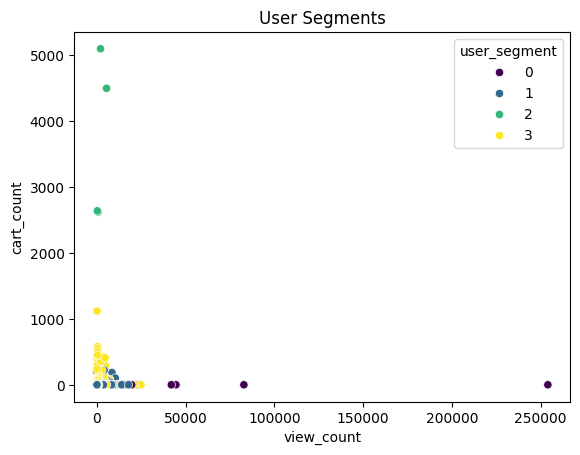

In [ ]:
# Visualize clusters
sns.scatterplot(x='view_count', y='cart_count', hue='user_segment', data=user_behavior, palette='viridis')
plt.title("User Segments")
plt.show()

In [ ]:
cluster_summary = user_behavior.groupby('user_segment').mean()
print(cluster_summary)

                   user_id   view_count   cart_count  is_purchase  \
user_segment                                                        
0             5.439093e+08  2411.299652     2.421603     0.000000   
1             5.373156e+08    63.841683     0.393179     0.252328   
2             5.297685e+08  2073.500000  3715.500000    65.500000   
3             5.379468e+08   367.814032    18.694844    16.804734   

              session_duration  
user_segment                    
0                 20303.754871  
1                   275.147305  
2                  2106.779539  
3                   968.341263  


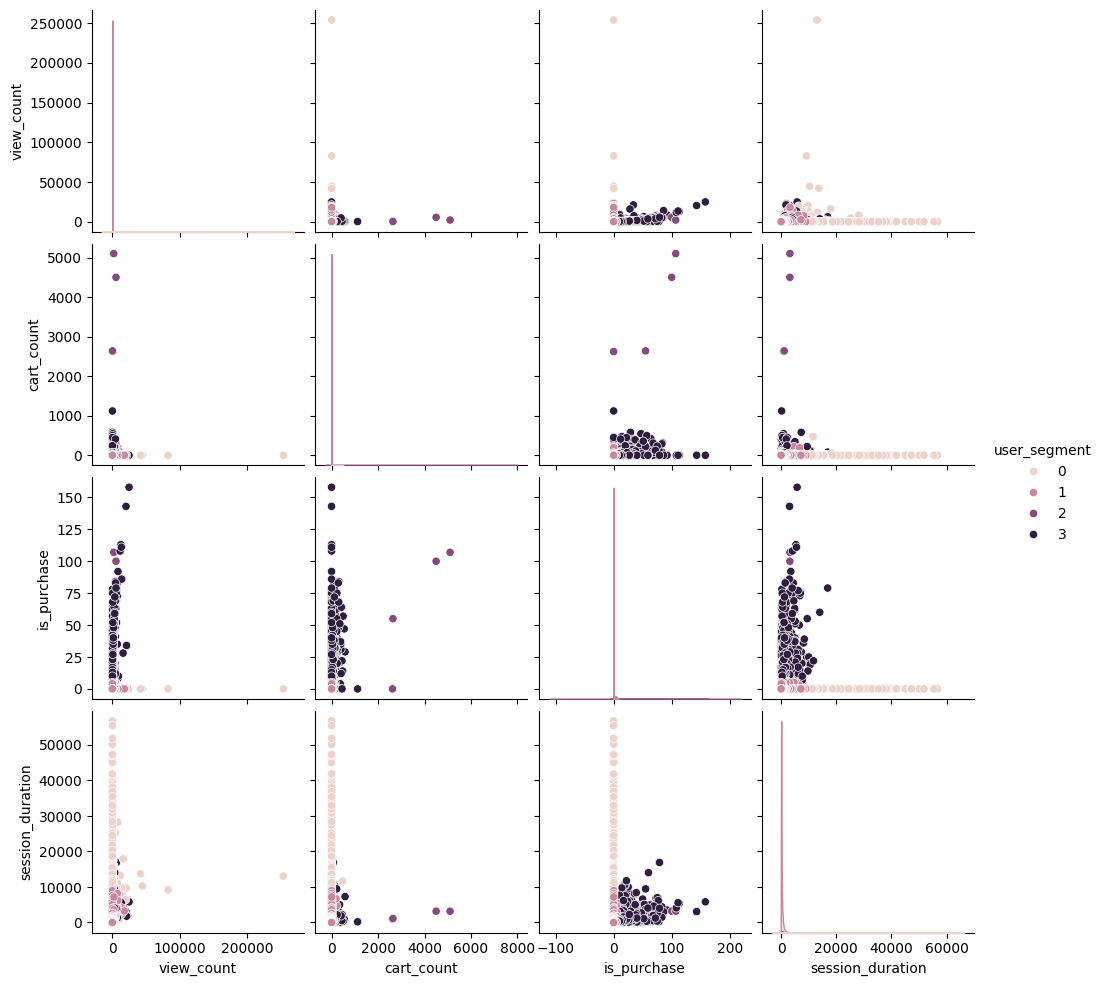

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pairplot to explore relationships between features
sns.pairplot(user_behavior, hue='user_segment', vars=['view_count', 'cart_count', 'is_purchase', 'session_duration'])
plt.show()

**Automate Marketing Messages**

In [ ]:
import pandas as pd

# Example user data with assigned clusters
user_data = pd.DataFrame({
    'user_id': [1, 2, 3, 4, 5],
    'user_segment': [0, 1, 2, 3, 0]
})

# Define messages for each cluster
personalized_messages = {
    0: "We see you’ve been exploring! Check out these trending deals before they’re gone.",
    1: "We miss you! Here’s 10% off your next purchase to welcome you back.",
    2: "Thank you for being a loyal customer! Enjoy exclusive early access to our new arrivals.",
    3: "Still thinking? Your favorite items are waiting in your cart—complete your purchase now!"
}

# Function to assign personalized messages
def assign_message(user_segment):
    return personalized_messages.get(user_segment, "Welcome! Check out our latest offers.")

# Add personalized messages to the user data
user_data['personalized_message'] = user_data['user_segment'].apply(assign_message)

# Display the user data with messages
print(user_data)

# Optionally, save the results to a CSV file
user_data.to_csv("personalized_messages.csv", index=False)


   user_id  user_segment                               personalized_message
0        1             0  We see you’ve been exploring! Check out these ...
1        2             1  We miss you! Here’s 10% off your next purchase...
2        3             2  Thank you for being a loyal customer! Enjoy ex...
3        4             3  Still thinking? Your favorite items are waitin...
4        5             0  We see you’ve been exploring! Check out these ...


In [ ]:
# Generate a message for the first 10 cart abandoners
cart_abandoners = user_behavior[user_behavior['user_segment'] == 1]  # Assume Segment 1 is cart abandoners

# Limit to 10 messages
for index, user in cart_abandoners.head(10).iterrows():
    user_name = f"User {user['user_id']}"  # Replace with actual name if available
    print(f"Hi {user_name}, we noticed you left items in your cart! Complete your purchase today and enjoy 10% off.")


Hi User 274969076.0, we noticed you left items in your cart! Complete your purchase today and enjoy 10% off.
Hi User 275256741.0, we noticed you left items in your cart! Complete your purchase today and enjoy 10% off.
Hi User 295643776.0, we noticed you left items in your cart! Complete your purchase today and enjoy 10% off.
Hi User 296465302.0, we noticed you left items in your cart! Complete your purchase today and enjoy 10% off.
Hi User 319315209.0, we noticed you left items in your cart! Complete your purchase today and enjoy 10% off.
Hi User 321019934.0, we noticed you left items in your cart! Complete your purchase today and enjoy 10% off.
Hi User 323962106.0, we noticed you left items in your cart! Complete your purchase today and enjoy 10% off.
Hi User 333288876.0, we noticed you left items in your cart! Complete your purchase today and enjoy 10% off.
Hi User 339186405.0, we noticed you left items in your cart! Complete your purchase today and enjoy 10% off.
Hi User 346207313.0

In [ ]:
###cart_abandoners = user_behavior[user_behavior['user_segment'] == 1]  # Assume Segment 1 is cart abandoners

# Generate a message for each user
#for index, user in cart_abandoners.iterrows():
    #user_name = f"User {user['user_id']}"  # Replace with actual name if available
    #print(f"Hi {user_name}, we noticed you left items in your cart! Complete your purchase today and enjoy 10% off.")

**Predicting Next Purchase or Category with Sequence Modeling**

In [ ]:
data = data.sort_values(by=['user_id', 'event_time'])


In [ ]:
sequences = data.groupby('user_id')['category_code'].apply(list)


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode category_code into integers
le = LabelEncoder()
data['category_code_encoded'] = le.fit_transform(data['category_code'].fillna('unknown'))

# Group by user_id and create sequences of encoded categories
sequences = data.groupby('user_id')['category_code_encoded'].apply(list).tolist()


In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_sequence_length = 10  # Adjust based on your data
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length, padding='post')


In [ ]:
import numpy as np

# Use all but the last element as input (X), and the last element as target (y)
X = np.array([seq[:-1] for seq in padded_sequences])
y = np.array([seq[-1] for seq in padded_sequences])


In [ ]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

# Step 1: Encode categories
le = LabelEncoder()
data['category_code_encoded'] = le.fit_transform(data['category_code'].fillna('unknown'))

# Step 2: Create sequences of encoded categories grouped by user
sequences = data.groupby('user_id')['category_code_encoded'].apply(list).tolist()

# Step 3: Pad sequences to a fixed length
max_sequence_length = 10  # Adjust based on data
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length, padding='post')

# Step 4: Split into input (X) and target (y)
X = np.array([seq[:-1] for seq in padded_sequences])
y = np.array([seq[-1] for seq in padded_sequences])


Model Training

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

# Define the model
model = Sequential([
    Embedding(input_dim=len(le.classes_), output_dim=50, input_length=X.shape[1]),
    LSTM(128, return_sequences=False),
    Dropout(0.2),
    Dense(len(le.classes_), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X, y, epochs=10, batch_size=32, validation_split=0.2)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
4416/4416 ━━━━━━━━━━━━━━━━━━━━ 86s 19ms/step - accuracy: 0.9050 - loss: 0.4853 - val_accuracy: 0.9634 - val_loss: 0.1496
Epoch 2/10
4416/4416 ━━━━━━━━━━━━━━━━━━━━ 101s 23ms/step - accuracy: 0.9474 - loss: 0.2196 - val_accuracy: 0.9645 - val_loss: 0.1428
Epoch 3/10
4416/4416 ━━━━━━━━━━━━━━━━━━━━ 83s 19ms/step - accuracy: 0.9504 - loss: 0.2039 - val_accuracy: 0.9651 - val_loss: 0.1402
Epoch 4/10
4416/4416 ━━━━━━━━━━━━━━━━━━━━ 142s 19ms/step - accuracy: 0.9520 - loss: 0.1958 - val_accuracy: 0.9650 - val_loss: 0.1400
Epoch 5/10
4416/4416 ━━━━━━━━━━━━━━━━━━━━ 145s 19ms/step - accuracy: 0.9510 - loss: 0.1931 - val_accuracy: 0.9653 - val_loss: 0.1387
Epoch 6/10
4416/4416 ━━━━━━━━━━━━━━━━━━━━ 140s 19ms/step - accuracy: 0.9523 - loss: 0.1866 - val_accuracy: 0.9655 - val_loss: 0.1387
Epoch 7/10
4416/4416 ━━━━━━━━━━━━━━━━━━━━ 82s 18ms/step - accuracy: 0.9523 - loss: 0.1879 - val_accuracy: 0.9651 - val_loss: 0.1410
Epoch 8/10
4416/4416 ━━━━━━━━━━━━━━━━━━━━ 86s 19ms/step - accuracy: 0.95

Prediction Example

In [ ]:
# Example sequence (replace with a real user sequence)
example_sequence = ['electronics.smartphone', 'appliances.kitchen.refrigerators']
encoded_sequence = le.transform(example_sequence)
padded_input = pad_sequences([encoded_sequence], maxlen=max_sequence_length, padding='post')

# Predict the next category
predicted_category_idx = model.predict(padded_input).argmax(axis=1)[0]
predicted_category = le.inverse_transform([predicted_category_idx])
print(f"Predicted next category: {predicted_category}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step
Predicted next category: ['accessories.bag']
